In [1]:
#Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import sklearn
import os
import shutil
import cv2
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score

In [2]:
#Loading the text file
df = pd.read_csv("dataset/Folds.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39545 entries, 0 to 39544
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   fold      39545 non-null  int64 
 1   mag       39545 non-null  int64 
 2   grp       39545 non-null  object
 3   filename  39545 non-null  object
dtypes: int64(2), object(2)
memory usage: 1.2+ MB


In [4]:
#Show first 5 entries
df.head()

,fold,mag,grp,filename
0,1,100,train,BreaKHis_v1/histology_slides/breast/benign/SOB...
1,1,100,train,BreaKHis_v1/histology_slides/breast/benign/SOB...
2,1,100,train,BreaKHis_v1/histology_slides/breast/benign/SOB...
3,1,100,train,BreaKHis_v1/histology_slides/breast/benign/SOB...
4,1,100,train,BreaKHis_v1/histology_slides/breast/benign/SOB...


In [5]:
print("Number of missing values in each column are: \n", df.isnull().sum())

Number of missing values in each column are: 
 fold        0
mag         0
grp         0
filename    0
dtype: int64


Checking for duplicates

In [6]:
#find duplicate rows across specific columns
duplicateRows = df[df.duplicated(['mag', 'grp', 'filename'])]

In [7]:
duplicateRows

,fold,mag,grp,filename
7909,2,100,train,BreaKHis_v1/histology_slides/breast/benign/SOB...
7910,2,100,train,BreaKHis_v1/histology_slides/breast/benign/SOB...
7911,2,100,train,BreaKHis_v1/histology_slides/breast/benign/SOB...
7912,2,100,train,BreaKHis_v1/histology_slides/breast/benign/SOB...
7913,2,100,train,BreaKHis_v1/histology_slides/breast/benign/SOB...
...,...,...,...,...
39540,5,400,test,BreaKHis_v1/histology_slides/breast/malignant/...
39541,5,400,test,BreaKHis_v1/histology_slides/breast/malignant/...
39542,5,400,test,BreaKHis_v1/histology_slides/breast/malignant/...
39543,5,400,test,BreaKHis_v1/histology_slides/breast/malignant/...


**Drop duplicates**

In [8]:
dataset = df.iloc[:7909, :]

In [9]:
dataset

,fold,mag,grp,filename
0,1,100,train,BreaKHis_v1/histology_slides/breast/benign/SOB...
1,1,100,train,BreaKHis_v1/histology_slides/breast/benign/SOB...
2,1,100,train,BreaKHis_v1/histology_slides/breast/benign/SOB...
3,1,100,train,BreaKHis_v1/histology_slides/breast/benign/SOB...
4,1,100,train,BreaKHis_v1/histology_slides/breast/benign/SOB...
...,...,...,...,...
7904,1,400,test,BreaKHis_v1/histology_slides/breast/malignant/...
7905,1,400,test,BreaKHis_v1/histology_slides/breast/malignant/...
7906,1,400,test,BreaKHis_v1/histology_slides/breast/malignant/...
7907,1,400,test,BreaKHis_v1/histology_slides/breast/malignant/...


In [10]:
#Renaming the column filename to path
dataset = dataset.rename(columns = {"filename":"path"})
#Show first 5 entries
dataset.head()

,fold,mag,grp,path
0,1,100,train,BreaKHis_v1/histology_slides/breast/benign/SOB...
1,1,100,train,BreaKHis_v1/histology_slides/breast/benign/SOB...
2,1,100,train,BreaKHis_v1/histology_slides/breast/benign/SOB...
3,1,100,train,BreaKHis_v1/histology_slides/breast/benign/SOB...
4,1,100,train,BreaKHis_v1/histology_slides/breast/benign/SOB...


**Extracting file name, class and subclass labels from the path column**

In [11]:
#Creating new columns for the filename, file location and labels from the path column
dataset['filename'] = dataset['path'].apply(lambda x:x.split("/")[-1])
dataset["label"] = dataset['path'].apply(lambda x: x.split("/")[3])
dataset["sublabel"] = dataset['path'].apply(lambda x: x.split("/")[5])
dataset['file_loc'] = dataset['label'] + "_" + dataset['filename']

In [12]:
#Show first 5 entries
dataset.head()

,fold,mag,grp,path,filename,label,sublabel,file_loc
0,1,100,train,BreaKHis_v1/histology_slides/breast/benign/SOB...,SOB_B_A-14-22549AB-100-001.png,benign,adenosis,benign_SOB_B_A-14-22549AB-100-001.png
1,1,100,train,BreaKHis_v1/histology_slides/breast/benign/SOB...,SOB_B_A-14-22549AB-100-002.png,benign,adenosis,benign_SOB_B_A-14-22549AB-100-002.png
2,1,100,train,BreaKHis_v1/histology_slides/breast/benign/SOB...,SOB_B_A-14-22549AB-100-003.png,benign,adenosis,benign_SOB_B_A-14-22549AB-100-003.png
3,1,100,train,BreaKHis_v1/histology_slides/breast/benign/SOB...,SOB_B_A-14-22549AB-100-004.png,benign,adenosis,benign_SOB_B_A-14-22549AB-100-004.png
4,1,100,train,BreaKHis_v1/histology_slides/breast/benign/SOB...,SOB_B_A-14-22549AB-100-005.png,benign,adenosis,benign_SOB_B_A-14-22549AB-100-005.png


Encoding the class to integer

In [13]:
#Encoding the class to integer
dataset['class'] = dataset['label'].apply(lambda x: 0 if x =='benign' else 1)

In [14]:
#Show first 5 entries
dataset.head()

,fold,mag,grp,path,filename,label,sublabel,file_loc,class
0,1,100,train,BreaKHis_v1/histology_slides/breast/benign/SOB...,SOB_B_A-14-22549AB-100-001.png,benign,adenosis,benign_SOB_B_A-14-22549AB-100-001.png,0
1,1,100,train,BreaKHis_v1/histology_slides/breast/benign/SOB...,SOB_B_A-14-22549AB-100-002.png,benign,adenosis,benign_SOB_B_A-14-22549AB-100-002.png,0
2,1,100,train,BreaKHis_v1/histology_slides/breast/benign/SOB...,SOB_B_A-14-22549AB-100-003.png,benign,adenosis,benign_SOB_B_A-14-22549AB-100-003.png,0
3,1,100,train,BreaKHis_v1/histology_slides/breast/benign/SOB...,SOB_B_A-14-22549AB-100-004.png,benign,adenosis,benign_SOB_B_A-14-22549AB-100-004.png,0
4,1,100,train,BreaKHis_v1/histology_slides/breast/benign/SOB...,SOB_B_A-14-22549AB-100-005.png,benign,adenosis,benign_SOB_B_A-14-22549AB-100-005.png,0


In [15]:
print('Number of samples for each class: \n', dataset["class"].value_counts())

Number of samples for each class: 
 1    5429
0    2480
Name: class, dtype: int64


Extracting images from the folders

In [16]:
#Creating new directory
os.makedirs("Image_Dataset/")

In [17]:
#Creating new directory for benign
os.makedirs("Image_Dataset/Benign/")

In [18]:
#Creating new directory for malignant
os.makedirs("Image_Dataset/Malignant/")

In [19]:
#Moving all the images into one folder (Image_Dataset)
i = 0
for p in dataset['path']:
    src = "dataset/BreaKHis_v1/" + p
    dest = "Image_Dataset/"
    if dataset["class"][i] == 0:
        dest = "Image_Dataset/Benign/"
    else:
        dest = "Image_Dataset/Malignant/"
    #saving the files with its corresponding class and patient_id
    dest = os.path.join(dest,src.split("/")[7]+ "_" + src.split("/")[-1])
    shutil.copyfile(src,dest)
    i +=1

In [20]:
#Check number of images in each folder
path = "Image_Dataset/"
dir_list = [os.path.join(path,i) for i in os.listdir(path)]
size_dict = {}
for i,value in enumerate(dir_list):
    size_dict[os.listdir(path)[i]] = len(os.listdir(value))
size_dict 

{'Benign': 2480, 'Malignant': 5429}

In [21]:
#Function to read the dataset from a specified directory
def import_images(folder,target):
    images = []
    for item in os.listdir(folder):
        img = cv2.imread(os.path.join(folder,item), cv2.IMREAD_COLOR)        
        img = cv2.resize(img, (224, 224))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        if img is not None:
            images.append([img,target])
    return images

In [22]:
#Importing the dataset from the specified directory using the created function and assign them with labels
#Where 0 is for Benign, 1 is malignant and 1 is for Malignant
benign = import_images("Image_Dataset/Benign",0)
malignant = import_images("Image_Dataset/Malignant",1)

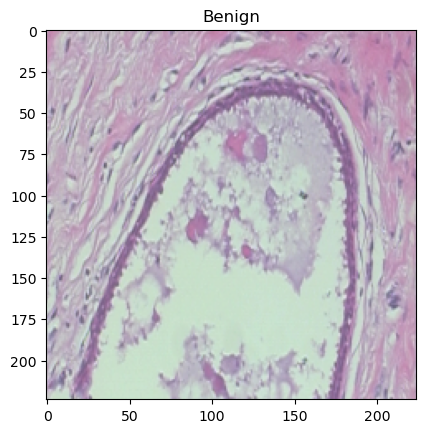

In [23]:
#Plotting the benign sample
plt.title('Benign')
plt.imshow(benign[0][0])

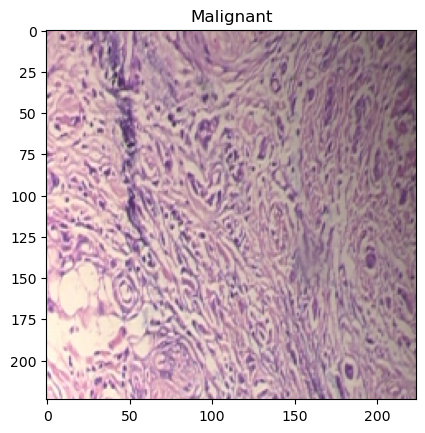

In [24]:
#Here is a sample of an image in the dataset
plt.title('Malignant')
plt.imshow(malignant[0][0])

In [25]:
#Joining all the dataset together
benign.extend(malignant)

In [26]:
#Assigning the dataset to a new variable 
full_data = benign

In [27]:
#Performing the dataset splitting into training and test set
training_data, test_dataset = train_test_split(full_data, test_size = 0.2, random_state = 30)

In [28]:
#Extracting validation dataset from the training data
training_dataset, val_dataset = train_test_split(training_data, test_size = 0.2, random_state = 30)

In [29]:
"""Function to separate the dataset into images and label puting the images in array called feature_map and labels into 
array called label"""

def split_data(main_data):
    feature_matrix = []
    label = []
    for x,y in main_data:
        feature_matrix.append(x)
        label.append(y)
    return np.array(feature_matrix), np.array(label)

Extracting Training dataset

In [30]:
#Extract validation images and labels
training_images, training_labels = split_data(training_dataset)

In [31]:
# Normalize images
training_images = np.array(training_images, dtype="float") / 255.0

In [32]:
#The shape of the datasets
print(training_images.shape)
print(training_labels.shape)

(5061, 224, 224, 3)
(5061,)


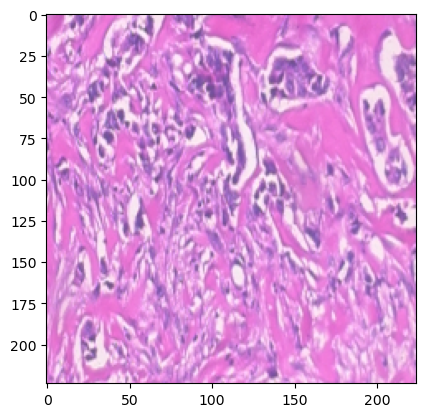

In [33]:
#The first image as a picture
plt.imshow(training_images[0])

In [34]:
#The first label in the dataset
training_labels[0]

1

In [35]:
#Check the data distribution among the classes
print(pd.Series(training_labels).value_counts())

1    3441
0    1620
dtype: int64


Extracting Test dataset

In [36]:
#Extract validation images and labels
test_images, test_labels = split_data(test_dataset)

In [37]:
# Normalize images
test_images = np.array(test_images, dtype="float") / 255.0

In [38]:
#The shape of the datasets
print(test_images.shape)
print(test_labels.shape)

(1582, 224, 224, 3)
(1582,)


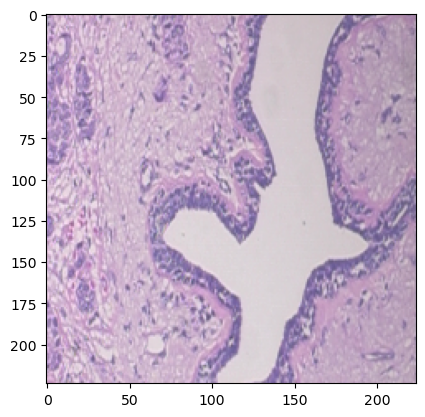

In [39]:
#The first image as a picture
plt.imshow(test_images[0])

In [40]:
#The first label in the dataset
test_labels[0]

1

In [41]:
#Check the data distribution among the classes
print(pd.Series(test_labels).value_counts())

1    1100
0     482
dtype: int64


Extracting Validation dataset

In [42]:
#Extract validation images and labels
val_images, val_labels = split_data(val_dataset)

In [43]:
# Normalize images
val_images = np.array(val_images, dtype="float") / 255.0

In [44]:
#The shape of the datasets
print(val_images.shape)
print(val_labels.shape)

(1266, 224, 224, 3)
(1266,)


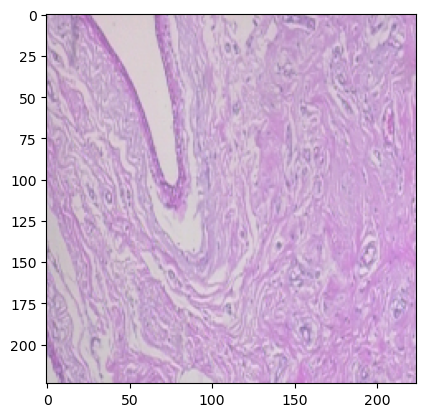

In [45]:
#The first image as a picture
plt.imshow(val_images[0])

In [46]:
#The first label in the dataset
val_labels[0]

1

In [47]:
#Check the data distribution among the classes
print(pd.Series(val_labels).value_counts())

1    888
0    378
dtype: int64


Model Training

In [48]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, Flatten, Dense, Dropout, MaxPooling2D, BatchNormalization
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.callbacks import EarlyStopping, Callback , ModelCheckpoint
from tensorflow.keras.metrics import Accuracy,binary_crossentropy, FalsePositives, FalseNegatives, TruePositives, TrueNegatives
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [64]:
import numpy as np
from keras.utils import Sequence

class SequenceDataGenerator(Sequence):
    def __init__(self, images, labels, sequence_length, batch_size):
        self.images = images
        self.labels = labels
        self.sequence_length = sequence_length
        self.batch_size = batch_size
        self.num_samples = len(images)

    def __len__(self):
        return int(np.ceil(self.num_samples / self.batch_size))

    def __getitem__(self, idx):
        batch_x = []
        batch_y = []
        start_idx = idx * self.batch_size
        end_idx = min((idx + 1) * self.batch_size, self.num_samples)
        for i in range(start_idx, end_idx):
            sequence_x = []
            for j in range(self.sequence_length):
                image_idx = i + j
                if image_idx < self.num_samples:
                    sequence_x.append(self.images[image_idx])
            while len(sequence_x) < self.sequence_length:
                sequence_x.append(np.zeros_like(self.images[0]))  # Pad with zeros if sequence length is not met
            batch_x.append(sequence_x)
            batch_y.append(self.labels[i])
        return np.array(batch_x), np.array(batch_y)

In [77]:
#Defining Image Data Generator for image augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest')

In [85]:
from keras.models import Model

# Define the VGG16 base model
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the convolutional layers of the VGG16 model
for layer in base_model.layers:
    layer.trainable = False

# Define the CNN-LSTM model
cancer_model = Sequential()

# Add the VGG16 base model
cancer_model.add(TimeDistributed(base_model, input_shape=(sequence_length, 224, 224, 3)))

# Flatten the spatial dimensions of the feature maps
cancer_model.add(TimeDistributed(Flatten()))

# Add LSTM layers
cancer_model.add(LSTM(256, return_sequences=False))

# Add Dense layers for classification
cancer_model.add(Dense(256, activation='relu'))
cancer_model.add(Dense(128, activation='relu'))
cancer_model.add(Dense(1, activation='sigmoid'))

# Compile the model
cancer_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Print model summary
cancer_model.summary()


Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed_23 (TimeD  (None, 5, 7, 7, 512)      14714688  
 istributed)                                                     
                                                                 
 time_distributed_24 (TimeD  (None, 5, 25088)          0         
 istributed)                                                     
                                                                 
 lstm_3 (LSTM)               (None, 256)               25953280  
                                                                 
 dense_15 (Dense)            (None, 256)               65792     
                                                                 
 dense_16 (Dense)            (None, 128)               32896     
                                                                 
 dense_17 (Dense)            (None, 1)                

In [86]:
#Setting the learning rate to reduce gradually over the training period
lr_schedule = tf.keras.optimizers.schedules.InverseTimeDecay(
  0.001,
  decay_steps=20*50,
  decay_rate=1,
  staircase=False)

def get_optimizer():
  return tf.keras.optimizers.Adam(lr_schedule)

In [87]:
#Compiling the model
cancer_model.compile(loss='binary_crossentropy', optimizer = get_optimizer(), metrics = ['accuracy'])
early_stop = EarlyStopping(monitor='val_loss',patience=5)
checkpoint = ModelCheckpoint("./Best_model/",save_best_only=True,)

In [88]:
sequence_length = 5  
batch_size = 32

# Create data generators
train_data_generator = SequenceDataGenerator(training_images, training_labels, sequence_length, batch_size)
val_data_generator = SequenceDataGenerator(val_images, val_labels, sequence_length, batch_size)

# Now, you can use these data generators in the model.fit_generator() function
history = cancer_model.fit(train_data_generator,
                                     validation_data=val_data_generator,
                                     epochs=10,
                                     callbacks=[early_stop, checkpoint],
                                     verbose=1)

Epoch 1/10
159/159 [==============================] - ETA: 0s - loss: 0.6356 - accuracy: 0.6799 INFO:tensorflow:Assets written to: ./Best_model\assets


INFO:tensorflow:Assets written to: ./Best_model\assets


159/159 [==============================] - 6725s 42s/step - loss: 0.6356 - accuracy: 0.6799 - val_loss: 0.6118 - val_accuracy: 0.7014
Epoch 2/10
  3/159 [..............................] - ETA: 1:36:36 - loss: 0.5918 - accuracy: 0.7292

KeyboardInterrupt: 

In [ ]:
#Plotting the model results

#Getting the accuracy
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

#Getting the losses
loss = history.history['loss']
val_loss = history.history['val_loss']

#No of epochs it trained
epochs_range = history.epoch

#Plotting Training and Validation accuracy
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

#Plotting Training and Validation Loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Performance Evaluation of the CNN model

In [ ]:
y_pred = cancer_model.predict(test_images)

In [ ]:
print(y_pred)

In [ ]:
#Round up model prediction to 0 and 1 and convert result to an array
rounded = [float(np.round(x)) for x in y_pred]
rounded_predictions = np.asarray(rounded).astype(int)
print(rounded_predictions)

In [ ]:
#Classification report
print(classification_report(test_labels, rounded_predictions))

In [ ]:
#Confusion matrix
cm = confusion_matrix(test_labels, rounded_predictions)
print(cm)

import seaborn as sns

#Setting the labels
labels = ['Benign', 'Malignant']

#Plot the Confusion matrix graph
fig= plt.figure(figsize=(8, 5))
ax = plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, fmt='g')
ax.set_xlabel('Predicted Labels', fontsize=10)
ax.xaxis.set_label_position('bottom')
plt.xticks(rotation=90)
ax.xaxis.set_ticklabels(labels, fontsize = 5)
ax.xaxis.tick_bottom()

ax.set_ylabel('True Labels', fontsize=10)
ax.yaxis.set_ticklabels(labels, fontsize = 10)
plt.yticks(rotation=0)

plt.title('Confusion Matrix', fontsize=15)

plt.savefig('ConMat24.png')
plt.show()

In [ ]:
#Accuracy
accuracy = accuracy_score(test_labels, rounded_predictions)
print('Accuracy: %f' % accuracy)

In [ ]:
#Precision
precision = precision_score(test_labels, rounded_predictions)
print('Precision: %f' % precision)

In [ ]:
# Recall
recall = recall_score(test_labels, rounded_predictions, pos_label=1)
print('Recall: %f' % recall)

In [ ]:
#Specificity 
specificity = recall_score(test_labels, rounded_predictions, pos_label=0)
print('Specificity: %f' % specificity)

In [ ]:
#F1-score
F1_score = f1_score(test_labels, rounded_predictions)
print('F1_score: %f' % F1_score)

In [ ]:
#Save the model
cancer_model.save("Final_custom_breast_cancer_model.h5")

VGG16 

In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16

In [ ]:
#Loading the model
base_model = VGG16(
    include_top=False,
    weights="imagenet",
    input_shape=(224, 224, 3),
)

#Making sure the layers of the VGG16 model are not retrained 
for layer in base_model.layers:
    layer.trainable = False

In [ ]:
#Adding custom top layers
VGG16_model = Sequential()
VGG16_model.add(base_model)

VGG16_model.add(Flatten())
VGG16_model.add(BatchNormalization())
#Adding two dense layer and dropout
VGG16_model.add(Dense(256,activation='relu'))
VGG16_model.add(Dropout(0.5))
VGG16_model.add(Dense(128,activation='relu'))
VGG16_model.add(Dropout(0.5))
VGG16_model.add(Dense(1,activation='sigmoid'))
VGG16_model.summary()

In [ ]:
#Compiling the model
VGG16_model.compile(optimizer='adam',loss='binary_crossentropy' ,metrics=['accuracy'])
early_stop = EarlyStopping(monitor='val_loss',patience=5)
checkpoint = ModelCheckpoint("./Best_model/",save_best_only=True,)

In [ ]:
#Fitted the VGG16 model on the training and and validation dataset using the image augmentor for 50 epochs
VGG16_history = VGG16_model.fit_generator(datagen.flow(training_images, training_labels, batch_size = bs),
                                     validation_data=datagen.flow(val_images, val_labels), 
                                     epochs=50,
                                     callbacks=[early_stop,checkpoint], 
                                     verbose = 1)

In [ ]:
#Plotting the model results

#Getting the accuracy
acc = VGG16_history.history['accuracy']
val_acc = VGG16_history.history['val_accuracy']

#Getting the losses
loss = VGG16_history.history['loss']
val_loss = VGG16_history.history['val_loss']

#No of epochs it trained
epochs_range = VGG16_history.epoch

#Plotting Training and Validation accuracy
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

#Plotting Training and Validation Loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Performance Evaluation of VGG16 CNN model

In [ ]:
vgg16_y_pred = VGG16_model.predict(test_images)

In [ ]:
print(vgg16_y_pred)

In [ ]:
#Round up model prediction to 0 and 1 and convert result to an array
rounded = [float(np.round(x)) for x in vgg16_y_pred]
rounded_vgg16 = np.asarray(rounded).astype(int)
print(rounded_vgg16)

In [ ]:
#Confusion matrix
cm = confusion_matrix(test_labels, rounded_vgg16)
print(cm)

import seaborn as sns

#Setting the labels
labels = ['Benign', 'Malignant']

#Plot the Confusion matrix graph
fig= plt.figure(figsize=(8, 5))
ax = plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, fmt='g')
ax.set_xlabel('Predicted Labels', fontsize=10)
ax.xaxis.set_label_position('bottom')
plt.xticks(rotation=90)
ax.xaxis.set_ticklabels(labels, fontsize = 5)
ax.xaxis.tick_bottom()

ax.set_ylabel('True Labels', fontsize=10)
ax.yaxis.set_ticklabels(labels, fontsize = 10)
plt.yticks(rotation=0)

plt.title('Confusion Matrix', fontsize=15)

plt.savefig('ConMat24.png')
plt.show()

In [ ]:
#Classification report
print(classification_report(test_labels, rounded_vgg16))

In [ ]:
#Accuracy
accuracy = accuracy_score(test_labels, rounded_vgg16)
print('Accuracy: %f' % accuracy)

In [ ]:
#Precision
precision = precision_score(test_labels, rounded_vgg16)
print('Precision: %f' % precision)

In [ ]:
# Recall
recall = recall_score(test_labels, rounded_vgg16, pos_label=1)
print('Recall: %f' % recall)

In [ ]:
#Specificity 
specificity = recall_score(test_labels, rounded_vgg16, pos_label=0)
print('Specificity: %f' % specificity)

In [ ]:
#F1-score
F1_score = f1_score(test_labels, rounded_vgg16)
print('F1_score: %f' % F1_score)

In [ ]:
#Save the model
VGG16_model.save("VGG16_breast_cancer_model.h5")

ResNet50

In [ ]:
from tensorflow import keras
from tensorflow.keras.layers import GlobalAveragePooling2D, Dropout, Dense, BatchNormalization, LSTM
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.applications import ResNet50
import tensorflow as tf

# Initialize ResNet50 with pre-trained weights
resnet = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze all layers except BatchNormalization
for layer in resnet.layers:
    if isinstance(layer, BatchNormalization):
        layer.trainable = True
    else:
        layer.trainable = False

# CNN-LSTM model
cnn_lstm = keras.models.Sequential(name='ResNet50-LSTM-for-BreakHis')

# Resize images to (224, 224) using tf.image.resize
def resize_images(x):
    return tf.image.resize(x, (224, 224))

# CNN part
cnn_lstm.add(tf.keras.layers.Lambda(resize_images))
cnn_lstm.add(resnet)
cnn_lstm.add(GlobalAveragePooling2D())
cnn_lstm.add(Dropout(0.2))
cnn_lstm.add(Dense(256, activation='relu'))
cnn_lstm.add(BatchNormalization())

# Reshape to introduce time dimension
cnn_lstm.add(tf.keras.layers.Reshape((1, -1)))

# LSTM part
cnn_lstm.add(LSTM(units=128, return_sequences=False))  # Adjust units as per your requirement

# Output layer
cnn_lstm.add(Dense(2, activation='softmax', name='Output_Layer'))

# Compile the model
cnn_lstm.compile(optimizer=keras.optimizers.Adam(learning_rate=1e-3),
                 loss='binary_crossentropy',
                 metrics=['accuracy'])

# Model checkpoint
checkpoint = ModelCheckpoint("./Best_model/", monitor='val_accuracy', save_best_only=True, mode='max', verbose=1)

# Build and summarize the model
cnn_lstm.build(input_shape=(None, 224, 224, 3))
cnn_lstm.summary()


In [ ]:
history = cnn_lstm.fit_generator(datagen.flow(training_images, training_labels, batch_size = 32),
                                     validation_data=datagen.flow(val_images, val_labels), 
                                     epochs=30, 
                                     verbose = 1)